In [237]:
import yt
yt.funcs.mylog.setLevel(40) # Surpresses YT status output.
import numpy as np
import matplotlib.pyplot as plt
import glob
import pickle

In [238]:
file_path = './M4V02_rm7/turbsph_hdf5_plt_cnt_0225'

ds = yt.load(file_path) # loads in data into data set class. This is what we will use to plot field values
ad = ds.all_data() # Can call on the data set's property .all_data() to make an object 
                   # containing all data available to be parsed through.
                   # print ad['mass'] will print the list of all cell masses. print ad.mass().max()


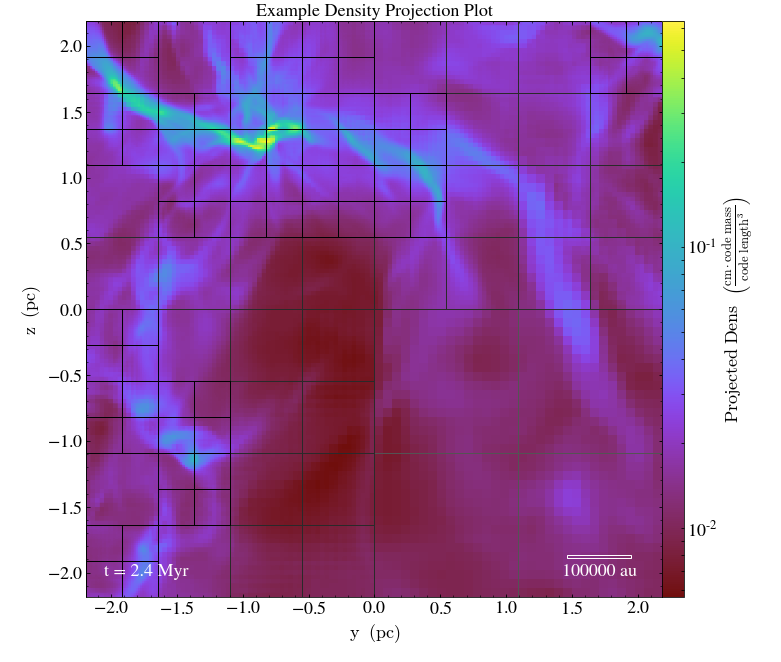

In [270]:
field ='dens'
ax = 'x'
plot_ = yt.ProjectionPlot(ds, ax, field)
plot_.annotate_timestamp()
plot_.annotate_grids()
#plot_.annotate_contour('pres')
#plot_.annotate_streamlines('velocity_y', 'velocity_z')
#plot_.annotate_cells()
plot_.zoom(4)
#plot_.annotate_velocity()
#plot_.set_zlim('dens', 1.0e-3, 1.0e-1)
plot_.annotate_title('Example Density Projection Plot')
plot_.annotate_scale()
plot_.show()

In [240]:
for i, typ in enumerate(ad['particle_type']):
    if typ == 2.0:
        print ad['particle_position'][i]#.to('Msun').value
        print i

[ -1.29060941e+18  -2.39755837e+18   3.94874797e+18] code_length
251
[ -1.25223028e+18  -2.44797682e+18   3.93798390e+18] code_length
252
[ -1.32579614e+18  -2.47714145e+18   3.93505742e+18] code_length
253
[ -1.55517776e+18  -2.39776467e+18   4.22668565e+18] code_length
316
[ -2.49973610e+18  -4.07836750e+18   1.53763279e+19] code_length
371
[ -2.82113904e+18  -4.64700586e+18   1.71960255e+19] code_length
373
[  4.76685059e+17  -6.02267627e+18   5.24451946e+18] code_length
379
[  5.37578558e+18  -1.07476215e+19   8.87055845e+18] code_length
420
[ -6.86303222e+18   1.08504985e+19   1.90243921e+18] code_length
471
[ -6.90910916e+18   1.09651348e+19   1.92692519e+18] code_length
472
[ -4.28151654e+18   1.23260599e+19   8.21625941e+18] code_length
519
[ -4.27130074e+18   1.22077269e+19   8.53804496e+18] code_length
565
[ -4.87688837e+18   1.06538776e+19   1.01689270e+19] code_length
591
[ -8.48421425e+18   1.39594106e+19   3.38812449e+18] code_length
600
[ -4.56781397e+17   1.26703114e+17

How to find the mass of each cell within a sink?
* The easiest way to do this would be to have the data be written out to the `sinks_evol.dat` file but this may require a bit of work since I would have to transport data of looped over blocks within sink. An exercise worth doing,=.
* with yt plotting, I have the info of where the sink particle is as well as its radius. With this, I can create a spherical data object that reads the internal mass. The data-object can be set to the sink's position so it remains followed if plt files are looped over. Can I get sinktag data here?? Yeeea baby, with `ad['particle_tag']`. Oh shit, and `ad['particle_blk']` (same as `ad['particle_index']`) is available too.
* also have `ad['gas', 'sound_speed']`, `ad['gas', 'kT']`
`ad[mesh_id]` corresponds to the cell id that the particle is in??

https://yt-project.org/doc/analyzing/filtering.html

In [241]:
print ds.derived_field_list

[('all', 'mesh_id'), ('all', u'particle_accr_rate'), ('all', u'particle_accx'), ('all', u'particle_accy'), ('all', u'particle_accz'), ('all', 'particle_angular_momentum'), ('all', 'particle_angular_momentum_magnitude'), ('all', 'particle_angular_momentum_x'), ('all', 'particle_angular_momentum_y'), ('all', 'particle_angular_momentum_z'), ('all', u'particle_bgdy'), ('all', u'particle_blk'), ('all', u'particle_creation_time'), ('all', u'particle_csgm'), ('all', 'particle_cylindrical_velocity_theta'), ('all', 'particle_cylindrical_velocity_z'), ('all', u'particle_dmdt'), ('all', u'particle_dtold'), ('all', u'particle_eion'), ('all', u'particle_epep'), ('all', u'particle_gpot'), ('all', 'particle_index'), ('all', u'particle_kine'), ('all', 'particle_mass'), ('all', u'particle_nion'), ('all', u'particle_npep'), ('all', u'particle_oacx'), ('all', u'particle_oacy'), ('all', u'particle_oacz'), ('all', u'particle_old_pmass'), ('all', 'particle_ones'), ('all', 'particle_position'), ('all', 'part

In [242]:
print ad['particle_radius']
print ad['particle_velocity_magnitude'].to('km/s').value.max()
print ad['gas', 'sound_speed'].to('km/s').value.max()


[  1.49787493e+19   1.06908673e+19   7.25006900e+18   1.12721804e+19
   1.35404686e+19   9.98202986e+18   1.44025717e+19   1.87690043e+19
   9.32157208e+18   4.48236003e+18   4.75862211e+18   2.92783927e+18
   3.34318637e+18   5.20695788e+18   5.75795373e+18   5.89292252e+18
   6.86386560e+18   4.95638221e+18   5.00344287e+18   5.40259569e+18
   5.23957870e+18   4.85037062e+18   5.32927832e+18   5.09835236e+18
   5.15489293e+18   4.75064311e+18   4.86027916e+18   4.78301878e+18
   4.97677870e+18   5.02910235e+18   4.76268736e+18   6.01339567e+18
   5.93747198e+18   6.20127521e+18   5.91923096e+18   5.98689718e+18
   5.72814162e+18   5.76024007e+18   5.34699218e+18   5.12637246e+18
   5.25171655e+18   5.24791927e+18   5.25681318e+18   4.81104988e+18
   5.28376419e+18   4.99017360e+18   4.81559054e+18   5.14891824e+18
   4.88753011e+18   5.15698328e+18   4.79278545e+18   4.93248895e+18
   4.86210224e+18   4.71370648e+18   4.90333996e+18   4.80871097e+18
   4.80367592e+18   5.32173556e+18

   1.85869659e+19   9.29447719e+18] cm
13.9630519632
7.62401749667


In [244]:
center = ad['particle_position'][470].v
print ad['particle_position'][470].v

radius = (1.318344e17, 'cm')
ds2 = yt.load('./M4V02_rm7/turbsph_hdf5_plt_cnt_0225')

sph = ds2.sphere(center, radius)
#sp = ds.sphere([0.5, 0.5, 0.5], (1, 'kpc'))
print "The sink is sitting on: ", len(sph['dx']), " cells."
print "The mean gas sound speed inside the sink is: ", (sph['gas','sound_speed']).mean()

cell_vol = sph['dx'].min().v ** 3
cell_masses = []
for den in sph['dens'].v:
    mass = den * cell_vol
    cell_masses.append(mass)
total_mass = sum(cell_masses) # in grams
print "total mass: ", total_mass
G = 6.67e-8
virial_v = np.sqrt((3./5) * G * total_mass / radius[0])

print "maximum cell density is: ", sph['dens'].v.max()

print "Virial velocity of sink (km/s) is: ", virial_v*1e-5
print "Virial velocity is this nuber of times greater than gas soundspeed: ", virial_v*1e-5 / (sph['gas','sound_speed']).to("km/s").mean().v

[ -6.87095934e+18   1.09233510e+19   1.87732731e+18]
The sink is sitting on:  65  cells.
The mean gas sound speed inside the sink is:  37414.3468286 cm/s
total mass:  3.66738788932e+33
maximum cell density is:  1.46345310961e-18
Virial velocity of sink (km/s) is:  0.333658806436
Virial velocity is this nuber of times greater than gas soundspeed:  0.891793749505


In [57]:
#Energy budget of gas within sink
print sph['kinetic_energy'][0]
kinetic_energy = 0.5*sph["gas", "velocity_magnitude"]**2
print kinetic_energy[0]
print sph['thermal_energy'][0]
print sph['total_energy'][0]
print sph['gpot'][0]
print (sph['thermal_energy'] + kinetic_energy / sph['total_energy']).mean()


6.27517970685e-10 dyne/cm**2
1727498924.23 cm**2/s**2
1252000384.0 erg/g
2979499264.0 erg/g
-93953753088.0 code_length**2/code_time**2


YTUnitOperationError: The addition operator for YTArrays with units (erg/g) and (cm**2*g/(erg*s**2)) is not well defined.

In [11]:
#print sph['particle_tag']
#print("(x,  y,  z)                       Temperature(K)          cs(km/s)")
#print("-----------------------")
#for i in range(sph["temperature"].size):
#    print("(%f,  %f,  %f)    %f     %f" %
#          (sph["x"][i].to('pc'), 
#           sph["y"][i].to('pc'), 
#           sph["z"][i].to('pc'), 
#           sph["temperature"][i], 
#           sph["sound_speed"][i].v))


In [22]:
m_star = 1e33
v_vir = 4e5
a = 1.5*1.318344e17
KE = 0.5*m_star*v_vir**2
PE = G*m_star*m_star / a
Etot = KE - PE
print Etot
print KE/PE

7.96627081652e+43
237.183328336


In [31]:
data_files = glob.glob('./M4V02_rm7/turbsph_hdf5_plt_cnt_01*')
print data_files
for file_ in data_files:
    ds = yt.load(file_)
    ad = ds.all_data()
    for i, particle_type in enumerate(ad['particle_type']):
        if particle_type == 2.0:
            print i
    print ad['particle_type']

['./M4V02_rm7/turbsph_hdf5_plt_cnt_0189', './M4V02_rm7/turbsph_hdf5_plt_cnt_0108', './M4V02_rm7/turbsph_hdf5_plt_cnt_0109']
20
21
183
203
213
239
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  2.  2.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  2.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  2.  1.  1.  1.  1.  1.  1.  1

YTFieldNotFound: Could not find field '('io', 'particle_type')' in turbsph_hdf5_plt_cnt_0108.

# Trying again, something slimmer
can we isolate the sink data in a nice way? Let's try:

https://yt-project.org/doc/analyzing/filtering.html

In [87]:
ds3 = yt.load('./M4V02_rm7/turbsph_hdf5_plt_cnt_0225')
ad3 = ds3.all_data()
sinks = ad3['particle_type'] > 1.0
print ad3['particle_velocity_magnitude'][sinks]

[ 380931.72870103  402879.49756774  125995.26938226  309053.97644369
   86462.82235111   73755.01042314  185533.6801459    78756.73518371
   75166.32112475  204545.26926649  134679.53073886   78433.80506441
   72009.53237681  126361.4413383   133830.81420414  111505.13572295
   83100.49075862] cm/s


# For Multiprocessing
I want to wrap this as a funciton so I can pass it through MPI.

I also want this to produce a structured numpy array to keep track of:
1. Simulation timestep,
2. Mass of sink particle,
3. Mass of gas that the sink is sitting on (all cells within sink radius)
4. Accretion rate of each sink

For EACH sink particle.

In [3]:
# SOME SUDO-CODE #
def analyze_sink_and_gas_mass(file_, array):
    #for glob in enumerate(glob(files)):
    ds3 = yt.load(file_)
    ad3 = ds3.all_data()
    sinks = ad3['particle_type'] > 1.0
    sink_ids = ad3['particle_tag'][sinks]
    for i in sink_ids:
        print i
    
    #if sink here:
    #  update appropriate index for time, masses
    #  use enumerate index for place in arrays
    #  increment counter
    
    #  make new row in array
    #  
    #else:
    #  make new array entry
    #  vstack
    return
analyze_sink_and_gas_mass('./M4V02_rm7/turbsph_hdf5_plt_cnt_0225')

1966085.0 dimensionless
524293.0 dimensionless
65538.0 dimensionless
3932166.0 dimensionless
5636103.0 dimensionless
1638408.0 dimensionless
1703946.0 dimensionless
3866631.0 dimensionless
65549.0 dimensionless
65540.0 dimensionless
1048590.0 dimensionless
65550.0 dimensionless
327695.0 dimensionless
65552.0 dimensionless
786449.0 dimensionless
65548.0 dimensionless
262161.0 dimensionless


### Creating the data structure

Employ structured numpy arrays (allows for column names as well as nested arrays in array elements).
Initialize with 'name', 'timestep', 'mass_sink', 'mass_gas', 'sink_acc' with data types **object** for the elements that need to be updated for each  

In [165]:
#x = np.array([('Rex', np.zeros(3), np.zeros(2)), ('Fido', 3, 27.0)], dtype=[('name', 'U10'), ('age', object), ('weight', object)])
x = np.array([('Rex', np.zeros(3), np.zeros(2))], dtype=[('name', 'U10'), ('age', object), ('weight', object)])
x

array([(u'Rex', [0.0, 0.0, 0.0], [0.0, 0.0])], 
      dtype=[('name', '<U10'), ('age', 'O'), ('weight', 'O')])

In [199]:
print x
print x[0]
print x[0][0]
print x[0][1][0]
print type(x['age'][0])
#print x['age'][1]
x['age'][0][1] = 5.0
print x['age'][0][1]
y = x.copy()
print y
y['name'][0] = '6555.0'
print x
print y

new_arr = np.array([('yomama', np.zeros(3), np.zeros(2))], dtype=[('name', 'U10'), ('age', object), ('weight', object)])

#Vstack needs to be assigned to new variable.
stacked = np.vstack((y,new_arr))
print stacked
if 'yomama' in stacked['name']:
    print "found it"
    yomama_loc = np.where(stacked['name'] == 'yomama')
    print stacked[yomama_loc]["age"]
else:
    print "not here"

[(u'Rex', [0.0, 5.0, 0.0], [0.0, 0.0])]
(u'Rex', [0.0, 5.0, 0.0], [0.0, 0.0])
Rex
0.0
<type 'numpy.ndarray'>
5.0
[(u'Rex', [0.0, 5.0, 0.0], [0.0, 0.0])]
[(u'Rex', [0.0, 5.0, 0.0], [0.0, 0.0])]
[(u'6555.0', [0.0, 5.0, 0.0], [0.0, 0.0])]
[[(u'6555.0', [0.0, 5.0, 0.0], [0.0, 0.0])]
 [(u'yomama', [0.0, 0.0, 0.0], [0.0, 0.0])]]
found it
[array([ 0.,  0.,  0.])]


In [229]:
import glob
data_files = glob.glob('./M4V02_rm7/turbsph_hdf5_plt*')
for i,j in enumerate(data_files):
    print i
    print j
test_arr = np.zeros(1)
sinks = test_arr[0] > 1.0
print sinks

0
./M4V02_rm7/turbsph_hdf5_plt_cnt_0189
1
./M4V02_rm7/turbsph_hdf5_plt_cnt_0109
2
./M4V02_rm7/turbsph_hdf5_plt_cnt_0225
False


In [256]:
def empty_array():
    x = np.array([('name', np.zeros(len(data_files)), 
                   np.zeros(len(data_files)), 
                   np.zeros(len(data_files)), 
                   np.zeros(len(data_files)),
                   np.zeros(len(data_files)),
                   np.zeros(len(data_files))
                  )],
                 dtype=[('name', 'U10'), 
                        ('time', object), 
                        ('sink_mass', object), 
                        ('gas_mass', object), 
                        ('sink_accr', object),
                        ('stars_in_sink', object),
                        ('star_mass_sink', object)
                       ])
    return x
def find_gas_and_stars_under_sink(data_set, center, radius):
    sph = data_set.sphere(center, radius)
    cell_vol = sph['dx'].min() ** 3
    #print sph['dens']
    stars_ind = np.where(sph['particle_type'] < 2.0)
    #print stars_ind
    gas_mass_tot = 0
    for den in sph['dens']:
        gas_mass_tot += den * cell_vol
        
    star_masses = sph['particle_mass'][stars_ind]
    star_mass_tot = star_masses.sum()
    num_stars = len(star_masses)
    
    #print "particles inside of sink: ", sph["particle_type"]
    return gas_mass_tot, star_mass_tot, num_stars

def get_sink_and_gas_mass(data_files):
    master_arr = empty_array()
    
    for ind, file_ in enumerate(data_files):
        #print file_
        #print ind
        ds = yt.load(file_)
        ad = ds.all_data()
        sim_time = ds.current_time.v
        
        sinks_ind = np.where(ad['particle_type'] > 1.0)
        
        #yes_sinks.any() == 2.0
        #print ad['particle_type'].v
        if len(sinks_ind[0]) < 1.0:
            print 'No sinks'
            sink_ids = None
        else:
            sink_ids = ad['particle_tag'][sinks_ind]
            for sink in sink_ids:
                sink_name = str(sink.v)
                
                #find location of this particular sink.
                sink_loc = np.where(ad['particle_tag'] == sink)
                sink_center = ad['particle_position'][sink_loc].v[0]
                #print 'sink center: ', sink_center[0]
                sink_radius = (2.636687e17, 'cm')
                
                if str(sink.v) not in master_arr['name']:
                    new_arr = empty_array()
                    
                    gas_mass, star_mass, num_stars = find_gas_and_stars_under_sink(ds, sink_center, sink_radius)
                    
                    new_arr['name'] = sink_name
                    new_arr['time'][0][ind] = sim_time
                    new_arr['sink_mass'][0][ind] = ( ad['particle_mass'][sink_loc].v )
                    new_arr['gas_mass'][0][ind] = ( gas_mass.v )
                    new_arr['sink_accr'][0][ind] = ( ad['particle_accr_rate'][sink_loc].v )
                    new_arr['stars_in_sink'][0][ind] = ( num_stars )
                    new_arr['star_mass_sink'][0][ind] = ( star_mass.v )
                    
                    master_arr = np.vstack((master_arr,new_arr))
                else:
                    gas_mass, star_mass, num_stars = find_gas_and_stars_under_sink(ds, sink_center, sink_radius)
                    
                    sink_arr_loc = np.where(master_arr['name'] == sink_name)
                    master_arr[sink_arr_loc]['time'][0][ind] = sim_time
                    master_arr[sink_arr_loc]['sink_mass'][0][ind] = ( ad['particle_mass'][sink_loc].v )
                    master_arr[sink_arr_loc]['gas_mass'][0][ind] = ( gas_mass.v )
                    master_arr[sink_arr_loc]['sink_accr'][0][ind] = ( ad['particle_accr_rate'][sink_loc].v )
                    master_arr[sink_arr_loc]['stars_in_sink'][0][ind] = ( num_stars )
                    master_arr[sink_arr_loc]['star_mass_sink'][0][ind] = ( star_mass.v )
            #print master_arr['gas_mass']
        #print sink_ids
    return master_arr
final_array = get_sink_and_gas_mass(data_files)
print final_array['stars_in_sink']

[[array([ 0.,  0.,  0.])]
 [array([ 14.,   0.,  67.])]
 [array([ 1.,  0.,  0.])]
 [array([ 126.,    0.,  138.])]
 [array([  2.,   0.,  30.])]
 [array([  4.,   0.,  40.])]
 [array([  7.,   0.,  17.])]
 [array([   0.,    0.,  116.])]
 [array([   0.,    0.,  118.])]
 [array([  0.,   0.,  33.])]
 [array([ 0.,  0.,  1.])]
 [array([ 0.,  0.,  2.])]
 [array([  0.,   0.,  40.])]
 [array([  0.,   0.,  39.])]
 [array([  0.,   0.,  34.])]
 [array([  0.,   0.,  20.])]
 [array([ 0.,  0.,  8.])]
 [array([ 0.,  0.,  4.])]
 [array([  0.,   0.,  16.])]]


In [234]:
pickle.dump(final_array, open("sink_data.pickle", "wb"))

In [236]:
reload_sinks = pickle.load(open("sink_data.pickle", "rb"))
print reload_sinks

[[ (u'name', [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0])]
 [ (u'3932166.0', [63755395042319.984, 0.0, 75115696856941.88], [1.3432795473385003e+34, 0.0, 1.1034034241261384e+33], [1.9466826930026464e+34, 0.0, 1.126277165499583e+34], [5.053440744501766e+21, 0.0, 2.118690003633133e+21])]
 [ (u'6356998.0', [63755395042319.984, 0.0, 0.0], [1.316046645837468e+32, 0.0, 0.0], [1.4964668134614556e+34, 0.0, 0.0], [8.344834217343197e+20, 0.0, 0.0])]
 [ (u'65538.0', [63755395042319.984, 0.0, 75115696856941.88], [3.177324753761691e+33, 0.0, 3.48427956463711e+32], [1.3829239291162952e+34, 0.0, 2.705208013003561e+34], [5.321282636520014e+21, 0.0, 0.0])]
 [ (u'3866631.0', [63755395042319.984, 0.0, 75115696856941.88], [2.4344714801466283e+33, 0.0, 9.336450626163234e+32], [1.614871238955212e+34, 0.0, 8.282618449667379e+33], [2.3913559115511717e+21, 0.0, 1.6398600485103607e+21])]
 [ (u'65540.0', [63755395042319.984, 38524085606616.2, 75115696856941.88], [2.0533314789054315e+33, 3.5

In [257]:
x = (5)
print x

5
